<a href="https://colab.research.google.com/github/hydekage/Sistem-Automasi/blob/master/SISTEM_OTOMASI_MODUL_STABILITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modul Kestabilan

## Pencarian akar / pole
Pole adalah nilai $s$ yang membuat penyebut dari fungsi alih $G(𝑠)$ menjadi nol.
$$G(s)=\frac{Y(s)}{U(s)}  ⇒ akar-akar \ dari \ U(s)=0 $$

Contoh:

$$G(s)=\frac{1}{s^3+4s^2+6s-2}$$

In [7]:
import sympy as sp
import matplotlib.pyplot as plt

# Definisikan variabel simbolik
s = sp.symbols('s')

# Definisikan persamaan karakteristik
# Misal: s^3 + 4s^2 + 6s - 2 = 0
char_eq = s**3 + 4*s**2 + 6*s - 2
display(char_eq)

# Cari akar-akarnya (pole)
poles = sp.solve(char_eq, s)

# Tampilkan hasil
numeric_poles = [sp.N(p) for p in poles]

print("hasil dari numeric poles:",numeric_poles)

s**3 + 4*s**2 + 6*s - 2

hasil dari numeric poles: [-2.13908153639907 - 1.61689738910596*I, -2.13908153639907 + 1.61689738910596*I, 0.278163072798149]


## Visualisasi Pole

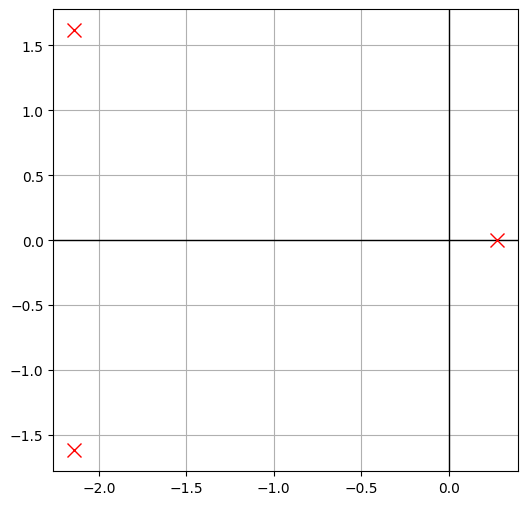

In [8]:
# Langkah 5: Ekstrak bagian real dan imajiner
real_parts = [sp.re(p) for p in numeric_poles]
imag_parts = [sp.im(p) for p in numeric_poles]

# Langkah 6: Visualisasikan menggunakan matplotlib
plt.figure(figsize=(6, 6))
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(True)
plt.plot(real_parts, imag_parts, 'rx', markersize=10, label='Pole')